In [3]:
import cv2

In [4]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [5]:
len(flags)

274

In [6]:
flags[40]

'COLOR_BGR2HLS'

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

# Segmentation of Nemo

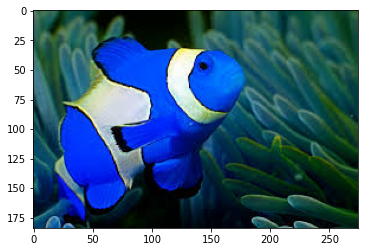

In [9]:
nemo = cv2.imread('../resources/nemo.jpg')
plt.imshow(nemo)
plt.show()

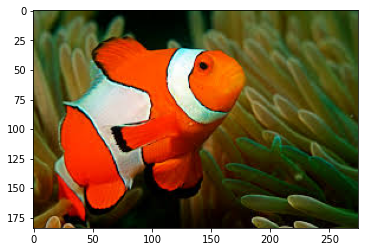

In [10]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

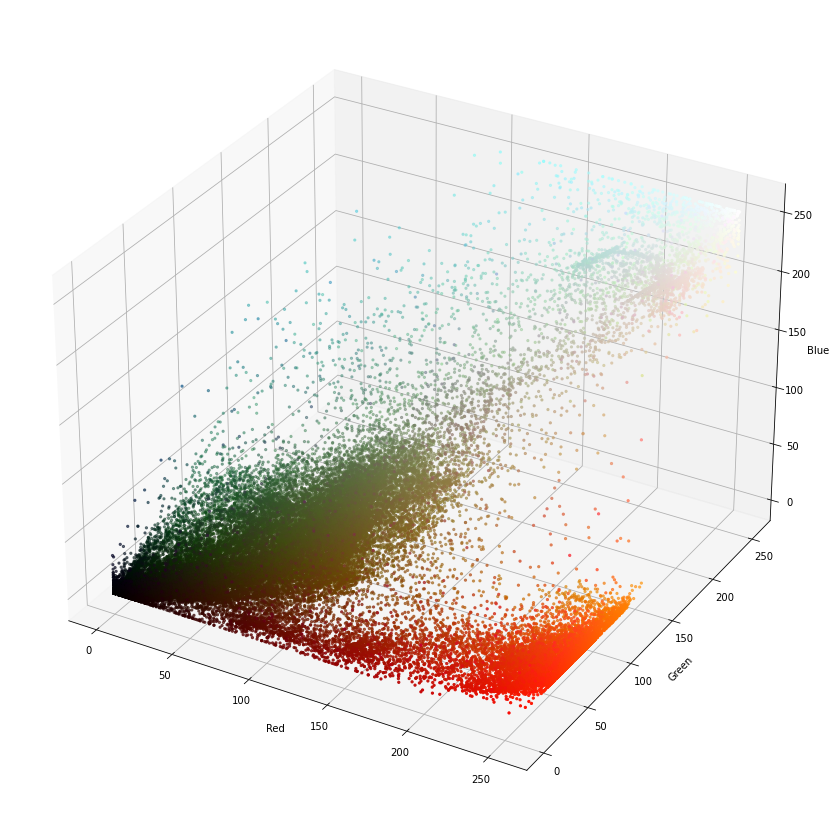

In [11]:
# Splitting components of image
r, g, b = cv2.split(nemo)

# Creating Figure for 3D plot
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection='3d')

# Normalising list of pixels
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Plotting
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

## HSV Colour Space
<img src="../resources/HSV_color_space.png">

In [12]:
# Convert the image from RGB to HSV
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

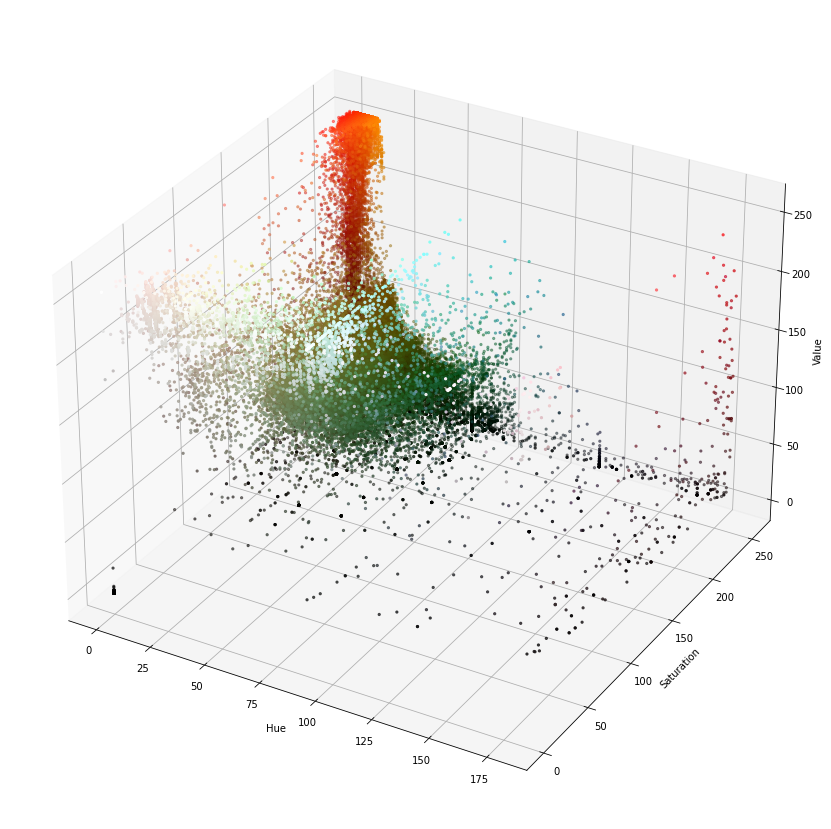

In [13]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [14]:
# Thresholds for segmenting Nemo
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [15]:
# Segmenting Nemo according to thresholds, using a mask
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
segmented_nemo = cv2.bitwise_and(nemo, nemo, mask=mask)

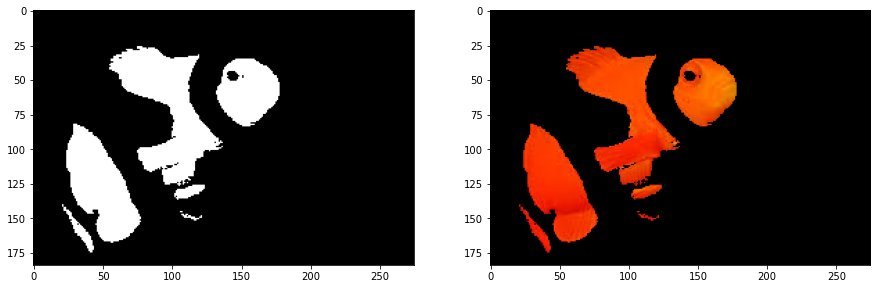

In [16]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(segmented_nemo)
plt.show()

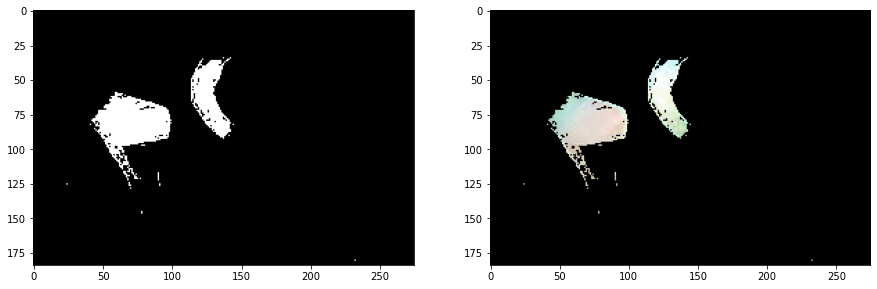

In [17]:
# Segmenting white stripes of Nemo
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

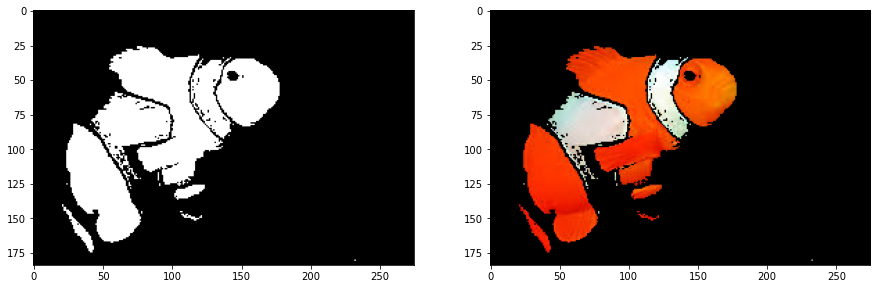

In [18]:
# Segmenting both white and orange parts of Nemo
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

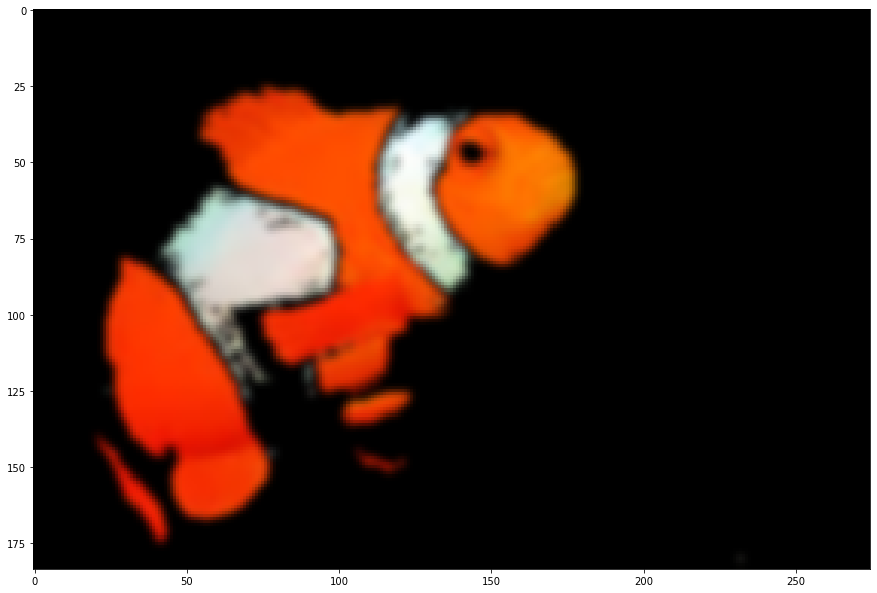

In [19]:
# Blurring to smoothen dark dots in the middle of Nemo
blur = cv2.GaussianBlur(final_result, (7, 7), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur)
plt.show()

# Segmentation of blue bird

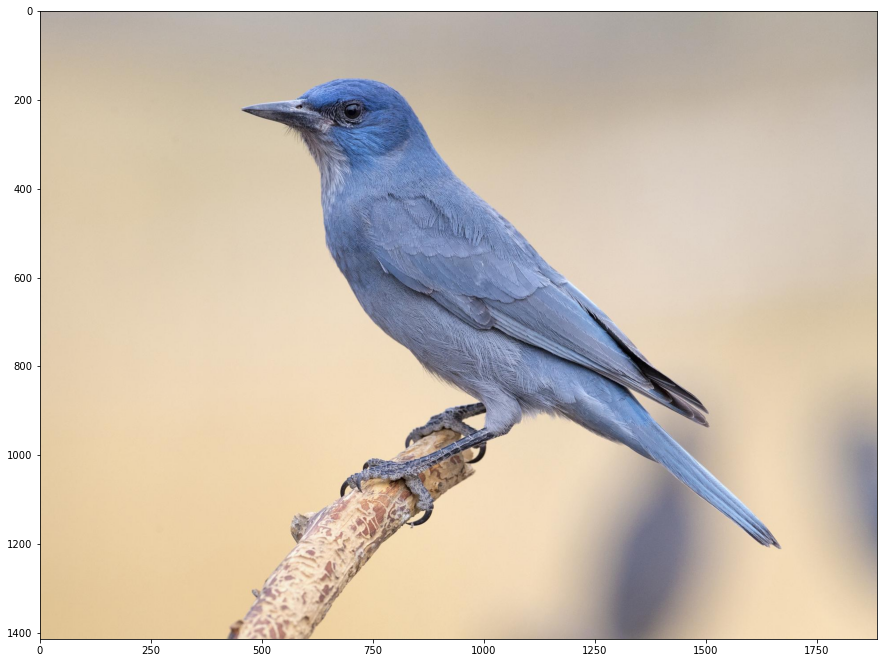

In [20]:
bird = cv2.imread('../resources/bird.jpg')
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(bird)
plt.show()

In [21]:
# Convert the image from RGB to HSV
hsv_bird = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

In [22]:
# Normalising list of pixels
pixel_colors_bird = bird.reshape((np.shape(bird)[0] * np.shape(bird)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors_bird)
pixel_colors_bird = norm(pixel_colors_bird).tolist()

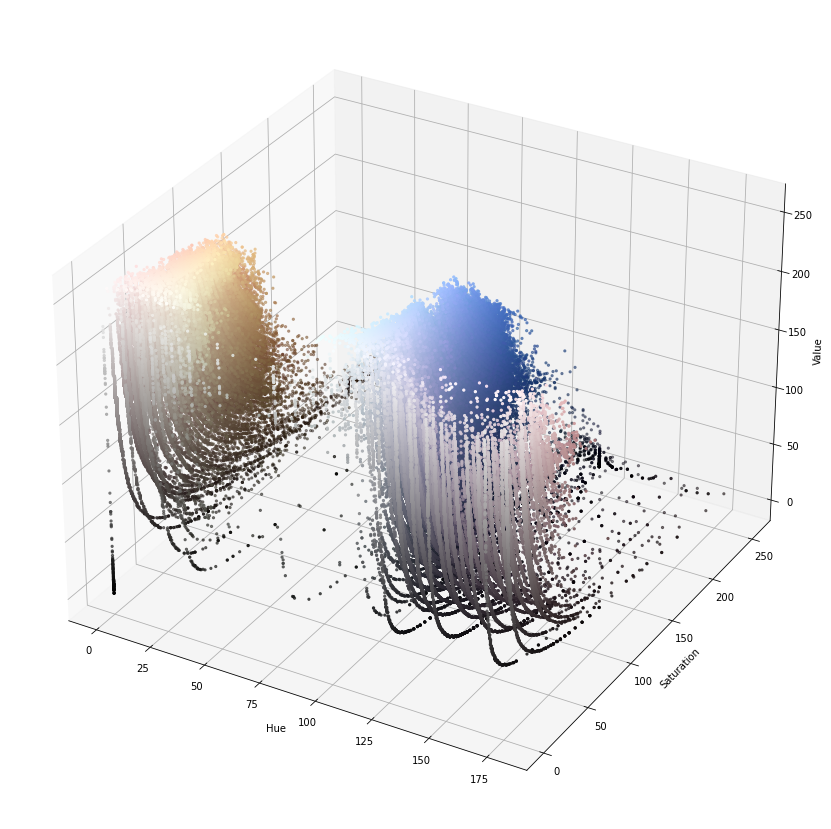

In [23]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_bird)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors_bird, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [397]:
light_blue = (75, 0, 0)#(100, 10, 170)
dark_blue = (160, 255, 255)

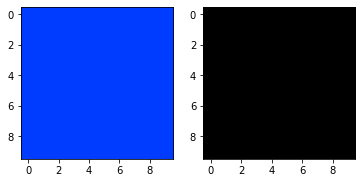

In [398]:
lb_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
db_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(db_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lb_square))
plt.show()

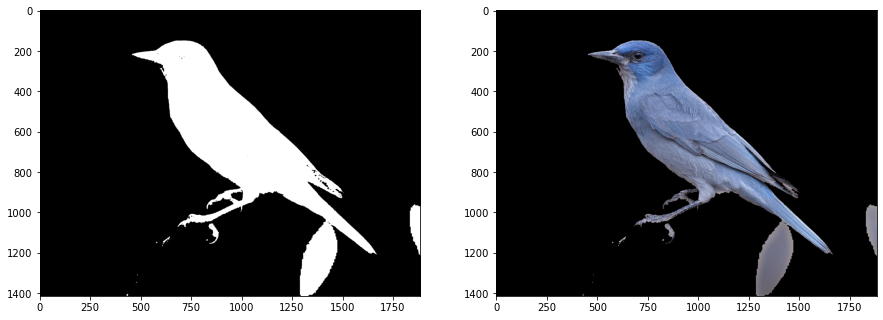

In [399]:
mask_blue = cv2.inRange(hsv_bird, light_blue, dark_blue)
result_blue = cv2.bitwise_and(bird, bird, mask=mask_blue)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()

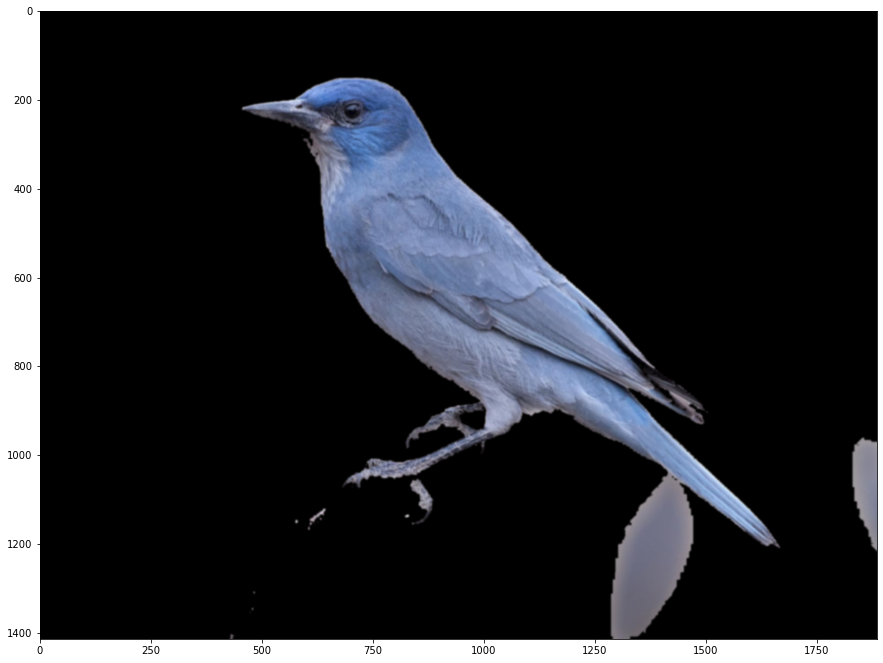

In [400]:
# Blurring to smoothen dark dots in the middle of Nemo
blur_bird = cv2.GaussianBlur(result_blue, (9, 9), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur_bird)
plt.show()

In [401]:
light_blue = (75, 0, 95)
dark_blue = (175, 50, 165)

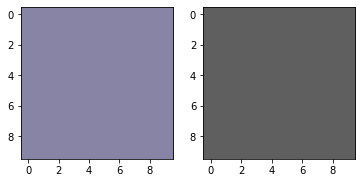

In [402]:
lb_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
db_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(db_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lb_square))
plt.show()

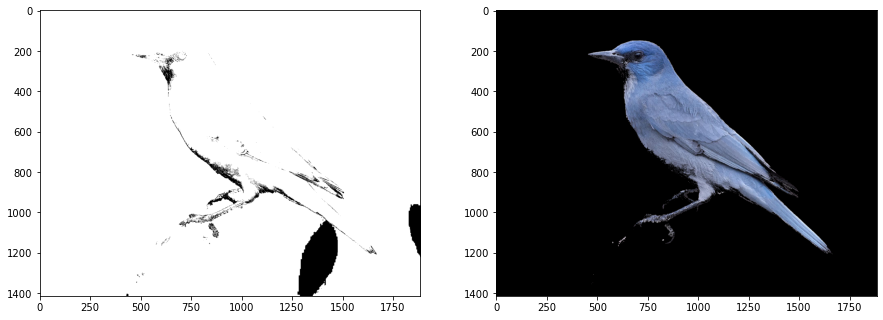

In [403]:
mask_blue = (255 - cv2.inRange(hsv_bird, light_blue, dark_blue))
result_blue = cv2.bitwise_and(result_blue, result_blue, mask=mask_blue)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()

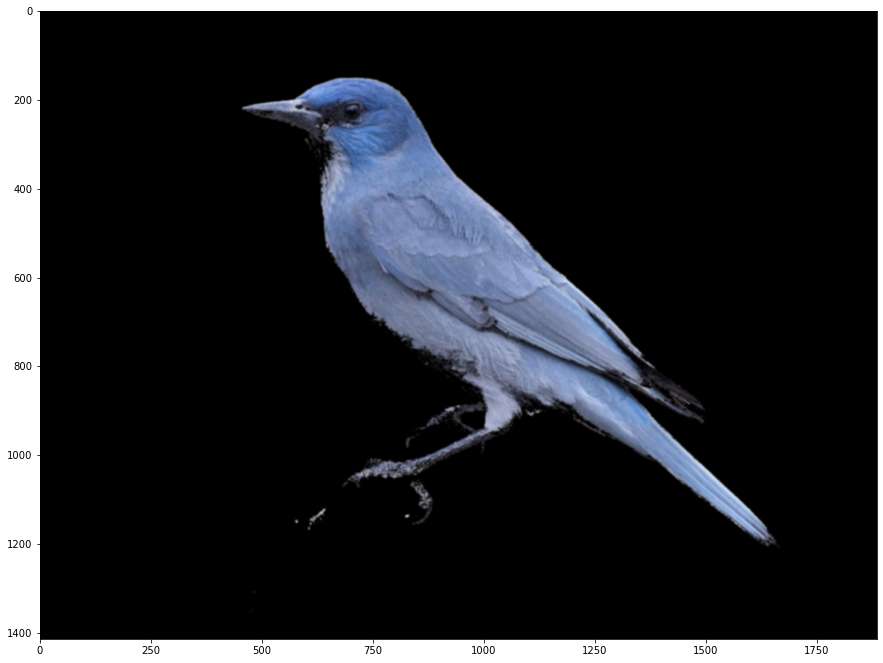

In [404]:
# Blurring to smoothen dark dots in the middle of Nemo
blur_bird = cv2.GaussianBlur(result_blue, (9, 9), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur_bird)
plt.show()

# Segmentation of red rose

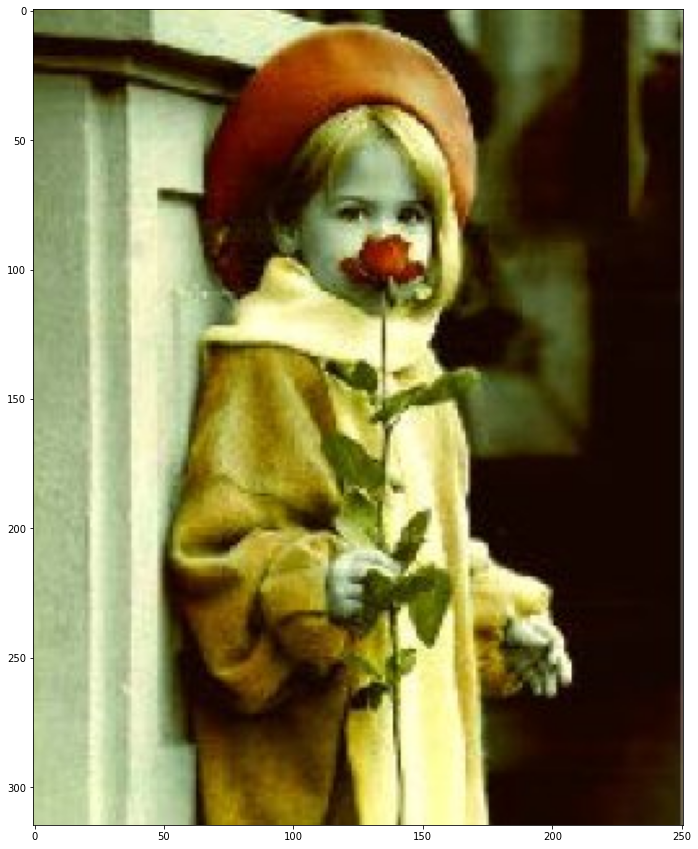

In [673]:
rose = cv2.imread('../resources/ninia_y_rosa.jpg')
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(rose)
plt.show()

In [674]:
# Convert the image from RGB to HSV
hsv_rose = cv2.cvtColor(rose, cv2.COLOR_RGB2HSV)

In [675]:
h, s, v = cv2.split(hsv_rose)

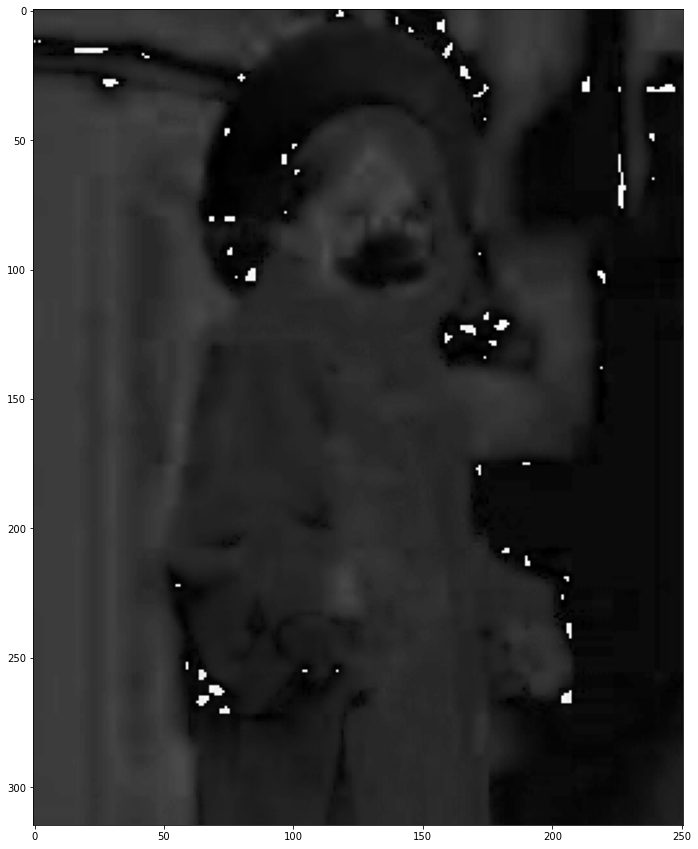

In [676]:
plt.figure(figsize=(15, 15))
plt.imshow(h, cmap='gray')

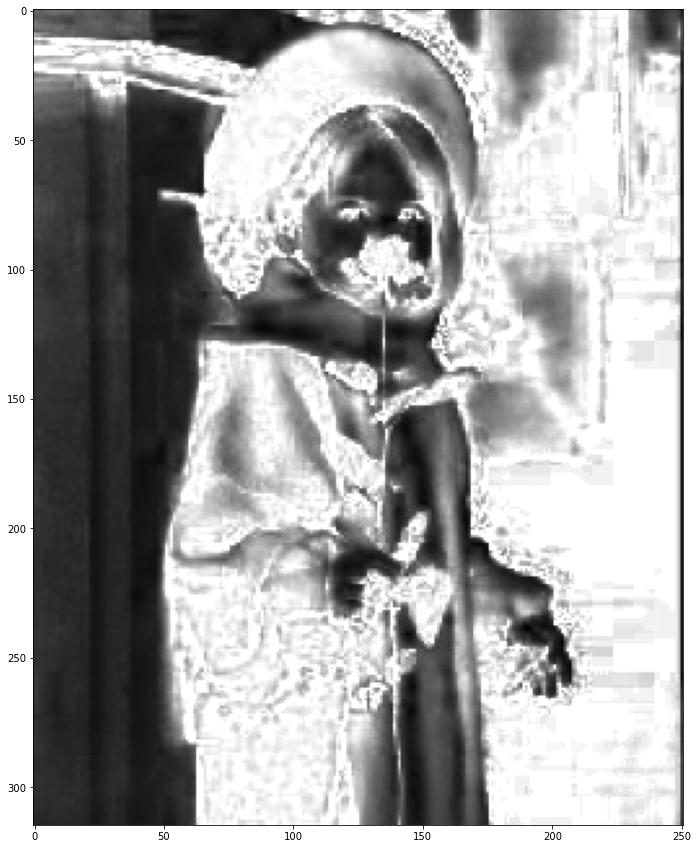

In [685]:
plt.figure(figsize=(15, 15))
plt.imshow(s, cmap='gray')

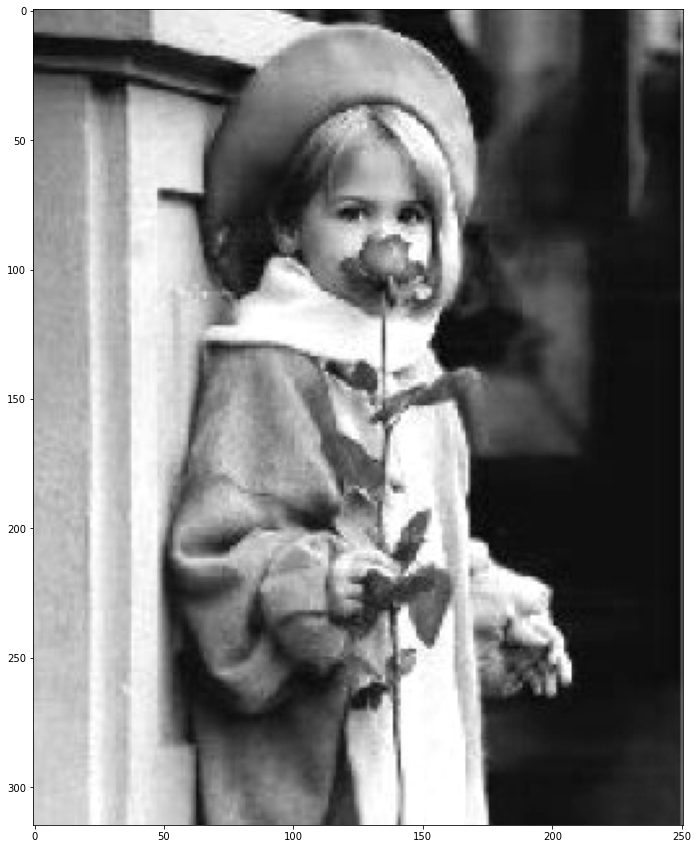

In [677]:
plt.figure(figsize=(15, 15))
plt.imshow(v, cmap='gray')

In [678]:
# Normalising list of pixels
pixel_colors_rose = rose.reshape((np.shape(rose)[0] * np.shape(rose)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors_rose)
pixel_colors_rose = norm(pixel_colors_rose).tolist()

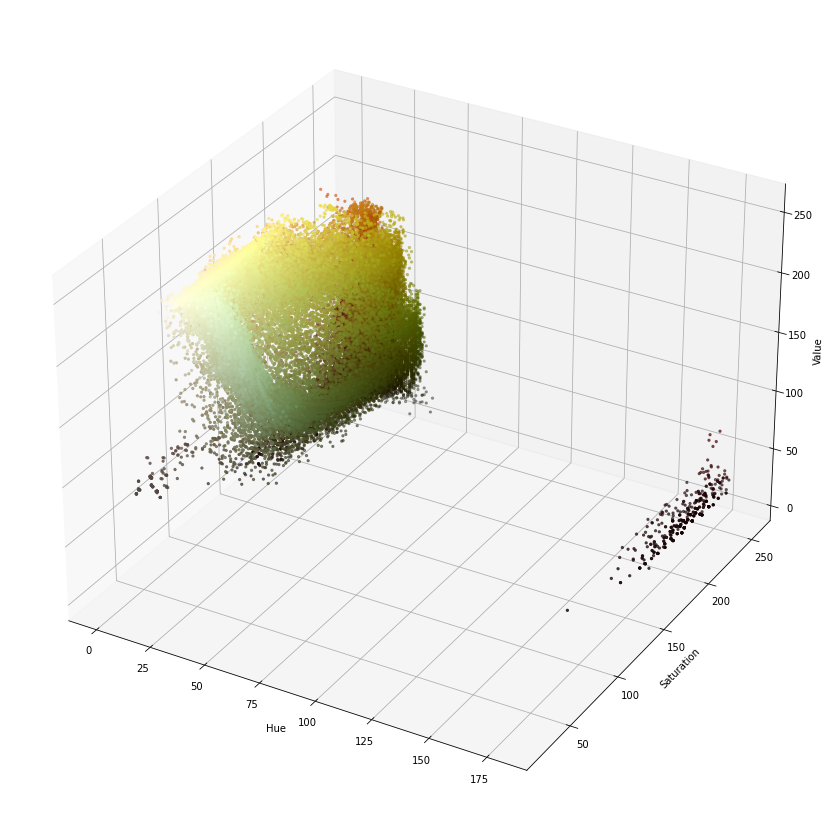

In [679]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_rose)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors_rose, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [770]:
light_red = (2, 150, 0)
dark_red = (16, 255, 255)

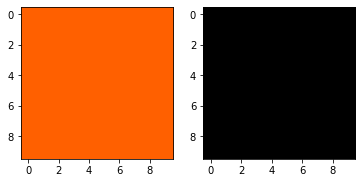

In [771]:
lr_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
dr_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(dr_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lr_square))
plt.show()

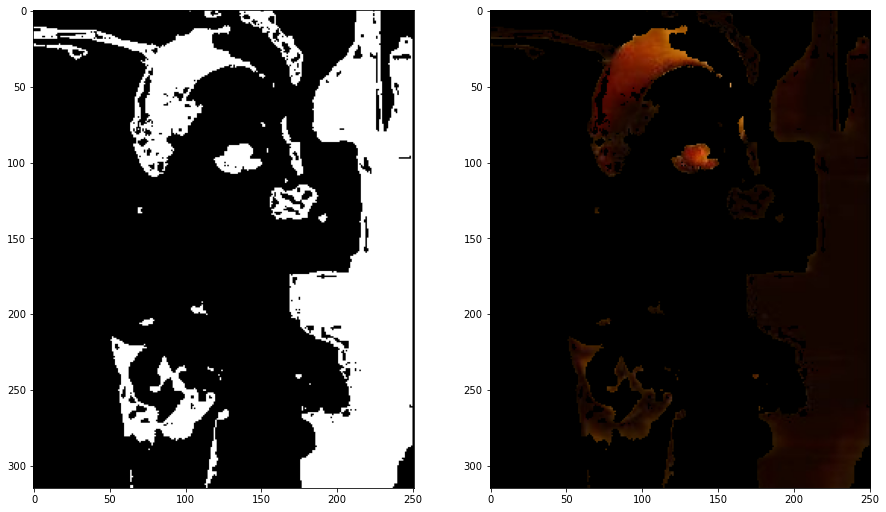

In [772]:
mask_red = cv2.inRange(hsv_rose, light_red, dark_red)
result_red = cv2.bitwise_and(rose, rose, mask=mask_red)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_red, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_red)
plt.show()

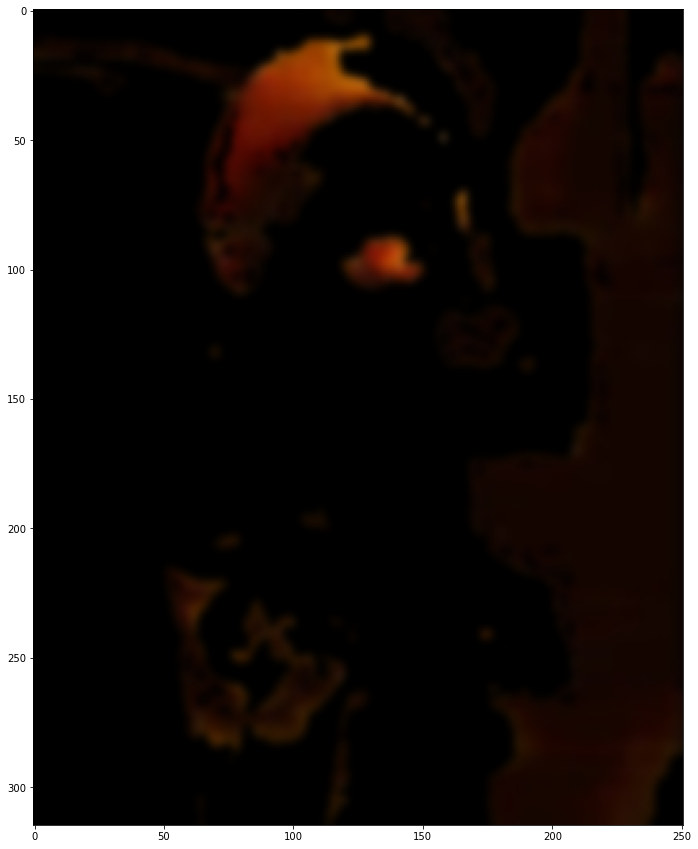

In [773]:
# Blurring to smoothen dark dots in the middle of Nemo
blur_rose = cv2.GaussianBlur(result_red, (9, 9), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur_rose)
plt.show()